# Canopy

Canopy is a new boutique streaming company that is looking to create an app to provide recommendations for each user based on their recently watched movies. You are working with the team to analyse the data, and the first step in any analysis is data ingestion.

## Importing the data and identifying it's structure

In [44]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the data to dataframes
movies = pd.read_excel('movies.xlsx')
ott = pd.read_csv('ott.csv')

In [3]:
# Validating the data to ensure it loaded correctly
movies.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,0.87,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,0.87,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,0.84,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,0.96,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,0.97,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [4]:
movies.tail()

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
16739,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,The Poof Point,2001,7+,4.7,NaN,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,Sharks of Lost Island,2013,NaN,5.7,NaN,Neil Gelinas,Documentary,United States,English,NaN
16742,Man Among Cheetahs,2017,NaN,6.6,NaN,Richard Slater-Jones,Documentary,United States,English,NaN
16743,In Beaver Valley,1950,NaN,NaN,NaN,James Algar,"Documentary,Short,Family",United States,English,32.0


In [5]:
movies.shape

(16744, 10)

In [6]:
ott.head()

,ID,Netflix,Hulu,Prime Video,Disney+
0,1,0,0,1,0
1,2,0,1,0,0
2,3,0,0,1,0
3,4,1,0,0,0
4,5,0,0,1,0


In [7]:
ott.tail()

,ID,Netflix,Hulu,Prime Video,Disney+
16739,16740,0,0,1,0
16740,16741,0,0,1,0
16741,16742,0,0,1,0
16742,16743,0,0,1,0
16743,16744,1,0,0,0


In [8]:
ott.shape

(16744, 5)

In [9]:
# Describing the movies data by looking at its type
print(movies.dtypes)
print(movies.info())
print(movies.describe())

Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes    float64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            16744 non-null  object 
 1   Year             16744 non-null  int64  
 2   Age              7354 non-null   object 
 3   IMDb             16173 non-null  float64
 4   Rotten Tomatoes  5158 non-null   float64
 5   Directors        16018 non-null  object 
 6   Genres           16469 non-null  object 
 7   Country          16309 non-null  object 
 8   Language         16130 non-null  object 
 9   Runtime          16152 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 1

In [10]:
# Same again for the ott.csv
print(ott.dtypes)
print(ott.info())
print(ott.describe())

ID             int64
Netflix        int64
Hulu           int64
Prime Video    int64
Disney+        int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           16744 non-null  int64
 1   Netflix      16744 non-null  int64
 2   Hulu         16744 non-null  int64
 3   Prime Video  16744 non-null  int64
 4   Disney+      16744 non-null  int64
dtypes: int64(5)
memory usage: 654.2 KB
None
                 ID       Netflix          Hulu   Prime Video       Disney+
count  16744.000000  16744.000000  16744.000000  16744.000000  16744.000000
mean    8372.500000      0.212613      0.053930      0.737817      0.033684
std     4833.720789      0.409169      0.225886      0.439835      0.180419
min        1.000000      0.000000      0.000000      0.000000      0.000000
25%     4186.750000      0.000000      0.000000      0.000000      0

## Dealing with missing data

In [11]:
# Identifying how many null value in 'Age' column
movies['Age'].isnull().sum()

9390

In [12]:
# Assigning the value 'Others' to the missing values in age
movies['Age'][movies['Age'].isna()] ='Others'
# Rechecking null values in 'Age'
movies['Age'].isnull().sum()

C:\Users\Charl\AppData\Local\Temp\ipykernel_13004\2300447816.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  movies['Age'][movies['Age'].isna()] ='Others'
C:\Users\Charl\AppData\Local\Temp\ipykernel_13004\2300447816.py:2: SettingWithCopy

0

In [13]:
# Carrying out the same process for columns 'Directors', 'Genres', 'Country' and 'Language'
movies['Directors'][movies['Directors'].isna()] = "Others"

movies['Genres'][movies['Genres'].isna()] = "Others"

movies['Country'][movies['Country'].isna()] = "Others"

movies['Language'][movies['Language'].isna()] = "Others"

# View the DataFrame
movies

C:\Users\Charl\AppData\Local\Temp\ipykernel_13004\172357552.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  movies['Directors'][movies['Directors'].isna()] = "Others"
C:\Users\Charl\AppData\Local\Temp\ipykernel_13004\172357552.py:2: Sett

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,0.87,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,0.87,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,0.84,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,0.96,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,0.97,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...
16739,The Ghosts of Buxley Hall,1980,Others,6.2,NaN,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,The Poof Point,2001,7+,4.7,NaN,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,Sharks of Lost Island,2013,Others,5.7,NaN,Neil Gelinas,Documentary,United States,English,NaN
16742,Man Among Cheetahs,2017,Others,6.6,NaN,Richard Slater-Jones,Documentary,United States,English,NaN


## Filtering the data

In [14]:
# Determine the column names and data types of the DataFrame.
print(movies.dtypes)
print(ott.dtypes)

Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes    float64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object
ID             int64
Netflix        int64
Hulu           int64
Prime Video    int64
Disney+        int64
dtype: object


In [15]:
# Create a new DataFrame so as not to overwrite the current movies DataFrame
# Select only the numerical values in the movies DF
movies_num = movies.select_dtypes('number')

movies_num

,Year,IMDb,Rotten Tomatoes,Runtime
0,2010,8.8,0.87,148.0
1,1999,8.7,0.87,136.0
2,2018,8.5,0.84,149.0
3,1985,8.5,0.96,116.0
4,1966,8.8,0.97,161.0
...,...,...,...,...
16739,1980,6.2,NaN,120.0
16740,2001,4.7,NaN,90.0
16741,2013,5.7,NaN,NaN
16742,2017,6.6,NaN,NaN


In [16]:
# Delete/drop the Year column by specifying the column name.
movies_no_year = movies_num.drop(['Year'], axis=1)

movies_no_year

,IMDb,Rotten Tomatoes,Runtime
0,8.8,0.87,148.0
1,8.7,0.87,136.0
2,8.5,0.84,149.0
3,8.5,0.96,116.0
4,8.8,0.97,161.0
...,...,...,...
16739,6.2,NaN,120.0
16740,4.7,NaN,90.0
16741,5.7,NaN,NaN
16742,6.6,NaN,NaN


In [17]:
# Calculate the IQR (Q1 and Q3) of each column, except the Year column.
q1 = movies_no_year.quantile(0.25)
q3 = movies_no_year.quantile(0.75)

movies_iqr = q3 - q1

movies_iqr

IMDb                1.80
Rotten Tomatoes     0.44
Runtime            22.00
dtype: float64

In [18]:
# Evaluate the range of the data set.
movies_num.describe()

,Year,IMDb,Rotten Tomatoes,Runtime
count,16744.000000,16173.000000,5158.000000,16152.000000
mean,2003.014035,5.902751,0.654285,93.413447
std,20.674321,1.347867,0.266145,28.219222
min,1902.000000,0.000000,0.020000,1.000000
25%,2000.000000,5.100000,0.440000,82.000000
50%,2012.000000,6.100000,0.710000,92.000000
75%,2016.000000,6.900000,0.880000,104.000000
max,2020.000000,9.300000,1.000000,1256.000000


## Merging DataFrames

In [19]:
# Reading the merge data in
movies_merge = pd.read_excel('movies_merge.xlsx')
ott_merge = pd.read_csv('ott_merge.csv')

In [20]:
# Validating the data load
print(ott_merge.shape)
ott_merge.head()

(16744, 5)


,ID,Netflix,Hulu,Prime Video,Disney+
0,1,0,0,1,0
1,2,0,1,0,0
2,3,0,0,1,0
3,4,1,0,0,0
4,5,0,0,1,0


In [21]:
print(movies_merge.shape)
movies_merge.head()

(16744, 11)


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,0.87,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,0.87,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,0.84,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,0.96,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,0.97,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [22]:
# Describing the data
ott_merge.dtypes

ID             int64
Netflix        int64
Hulu           int64
Prime Video    int64
Disney+        int64
dtype: object

In [23]:
movies_merge.dtypes

ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes    float64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object

In [24]:
# Combine using the merge function
movies_ott_merge = movies_merge.merge(ott_merge, on= 'ID', how='left')

movies_ott_merge

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
0,1,Inception,2010,13+,8.8,0.87,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,0,0,1,0
1,2,The Matrix,1999,18+,8.7,0.87,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,0,1,0,0
2,3,Avengers: Infinity War,2018,13+,8.5,0.84,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,0,0,1,0
3,4,Back to the Future,1985,7+,8.5,0.96,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,1,0,0,0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,0.97,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0,0,0,1,0
16740,16741,The Poof Point,2001,7+,4.7,NaN,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0,0,0,1,0
16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,Neil Gelinas,Documentary,United States,English,NaN,0,0,1,0
16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,Richard Slater-Jones,Documentary,United States,English,NaN,0,0,1,0


In [25]:
# Combine using the concat function
movies_ott_con = pd.concat([movies_merge, ott_merge], axis= 0)

movies_ott_con

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
0,1,Inception,2010.0,13+,8.8,0.87,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,NaN,NaN,NaN,NaN
1,2,The Matrix,1999.0,18+,8.7,0.87,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,NaN,NaN,NaN,NaN
2,3,Avengers: Infinity War,2018.0,13+,8.5,0.84,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,NaN,NaN,NaN,NaN
3,4,Back to the Future,1985.0,7+,8.5,0.96,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,NaN,NaN,NaN,NaN
4,5,"The Good, the Bad and the Ugly",1966.0,18+,8.8,0.97,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
16740,16741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
16741,16742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
16742,16743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0


## Practical activity: Using groupby() and aggregate() functions

### How many films from each year (released from 2012 to the present) were watched on Netflix?

In [26]:
# Group the data by the 'Year' column and count the number of movies released each year.
mo_gbpy = movies_ott_merge.groupby('Year')['Netflix'].count().reset_index()

# Find the films released in 2012 and later, and sort them in descending order.
mo_gbpy = mo_gbpy[mo_gbpy['Year'] >= 2012].sort_values('Year', ascending= False)

# Display the DataFrame
mo_gbpy

,Year,Netflix
108,2020,147
107,2019,689
106,2018,1285
105,2017,1401
104,2016,1206
103,2015,1065
102,2014,986
101,2013,964
100,2012,843


### What is the average runtime of movies released each year?

In [27]:
# Group the data by the 'Year' column and calculate the average runtime of movies each year.
mo_gbpy1 = movies_ott_merge.groupby('Year')['Runtime'].mean().reset_index()

# Find the films released in 2012 and later, and sort them in descending order.
mo_gbpy1 = mo_gbpy1[mo_gbpy1['Year'] >= 2012].sort_values('Runtime', ascending= False)

# Display the DataFrame
mo_gbpy1

,Year,Runtime
106,2018,94.635678
105,2017,94.460961
104,2016,93.992140
108,2020,93.976562
107,2019,93.410413
102,2014,92.995763
103,2015,92.914646
101,2013,91.545940
100,2012,90.511714


### What are the best and worst reviewes that movies received on Rotten Tomatoes per year?

In [28]:
# Group the data by the 'Year' column and calculate the maximum and minimum Rotten Tomatoes ratings for movies each year.
mo_gpby2 = movies_ott_merge.groupby('Year')['Rotten Tomatoes'].agg(['max', 'min']).reset_index()

# Find the films released in 2012 and later, and sort them in descending order.
mo_gpby2 = mo_gpby2[mo_gpby2['Year'] >= 2012].sort_values('Year', ascending= False)

# Display the DataFrame
mo_gpby2

,Year,max,min
108,2020,1.0,0.06
107,2019,1.0,0.05
106,2018,1.0,0.06
105,2017,1.0,0.04
104,2016,1.0,0.02
103,2015,1.0,0.05
102,2014,1.0,0.05
101,2013,1.0,0.02
100,2012,1.0,0.04


## 3.1.12 Practical activity: Reshaping a DataFrame

In [29]:
# Create a pivot table showing film release date and content rating.
age_content_pivot = movies.pivot(
    index='Title',
    columns='Age',
    values='Year'
)

age_content_pivot

Age,13+,16+,18+,7+,Others,all
Title,,,,,,
Inception,2010.0,NaN,NaN,NaN,NaN,NaN
The Matrix,NaN,NaN,1999.0,NaN,NaN,NaN
Avengers: Infinity War,2018.0,NaN,NaN,NaN,NaN,NaN
Back to the Future,NaN,NaN,NaN,1985.0,NaN,NaN
"The Good, the Bad and the Ugly",NaN,NaN,1966.0,NaN,NaN,NaN
...,...,...,...,...,...,...
The Ghosts of Buxley Hall,NaN,NaN,NaN,NaN,1980.0,NaN
The Poof Point,NaN,NaN,NaN,2001.0,NaN,NaN
Sharks of Lost Island,NaN,NaN,NaN,NaN,2013.0,NaN


In [30]:
# Pivot table showing films by age rating and directors and grenres
director_genre_pivot = movies.pivot(
    index='Title',
    columns='Age',
    values= ['Directors', 'Genres']
)

director_genre_pivot

Directors       \
Age                                                 13+  16+   
Title                                                          
Inception                             Christopher Nolan  NaN   
The Matrix                                          NaN  NaN   
Avengers: Infinity War          Anthony Russo,Joe Russo  NaN   
Back to the Future                                  NaN  NaN   
The Good, the Bad and the Ugly                      NaN  NaN   
...                                                 ...  ...   
The Ghosts of Buxley Hall                           NaN  NaN   
The Poof Point                                      NaN  NaN   
Sharks of Lost Island                               NaN  NaN   
Man Among Cheetahs                                  NaN  NaN   
In Beaver Valley                                    NaN  NaN   

                                                                \
Age                                                        18+   
Title                                                            
Inception                                                  NaN   
The Matrix                      Lana Wachowski,Lilly Wachowski   
Avengers: Infinity War                                     NaN   
Back to the Future                                         NaN   
The Good, the Bad and the Ugly                    Sergio Leone   
...                                                        ...   
The Ghosts of Buxley Hall                                  NaN   
The Poof Point                                             NaN   
Sharks of Lost Island                                      NaN   
Man Among Cheetahs                                         NaN   
In Beaver Valley                                           NaN   

                                                                            \
Age                                          7+                Others  all   
Title                                                                        
Inception                                   NaN                   NaN  NaN   
The Matrix                                  NaN                   NaN  NaN   
Avengers: Infinity War                      NaN                   NaN  NaN   
Back to the Future              Robert Zemeckis                   NaN  NaN   
The Good, the Bad and the Ugly              NaN                   NaN  NaN   
...                                         ...                   ...  ...   
The Ghosts of Buxley Hall                   NaN          Bruce Bilson  NaN   
The Poof Point                      Neal Israel                   NaN  NaN   
Sharks of Lost Island                       NaN          Neil Gelinas  NaN   
Man Among Cheetahs                          NaN  Richard Slater-Jones  NaN   
In Beaver Valley                            NaN           James Algar  NaN   

                                                          Genres       \
Age                                                          13+  16+   
Title                                                                   
Inception                       Action,Adventure,Sci-Fi,Thriller  NaN   
The Matrix                                                   NaN  NaN   
Avengers: Infinity War                   Action,Adventure,Sci-Fi  NaN   
Back to the Future                                           NaN  NaN   
The Good, the Bad and the Ugly                               NaN  NaN   
...                                                          ...  ...   
The Ghosts of Buxley Hall                                    NaN  NaN   
The Poof Point                                               NaN  NaN   
Sharks of Lost Island                                        NaN  NaN   
Man Among Cheetahs                                           NaN  NaN   
In Beaver Valley                                             NaN  NaN   

                                                                        \
Age                               

In [31]:
# Title of movies, the released year, and the language by content rating
title_year_lang = movies.pivot(
    index='Title',
    columns='Age',
    values= ['Year', 'Language']
)

title_year_lang

Year                               \
Age                              13+  16+   18+    7+ Others  all   
Title                                                               
Inception                       2010  NaN   NaN   NaN    NaN  NaN   
The Matrix                       NaN  NaN  1999   NaN    NaN  NaN   
Avengers: Infinity War          2018  NaN   NaN   NaN    NaN  NaN   
Back to the Future               NaN  NaN   NaN  1985    NaN  NaN   
The Good, the Bad and the Ugly   NaN  NaN  1966   NaN    NaN  NaN   
...                              ...  ...   ...   ...    ...  ...   
The Ghosts of Buxley Hall        NaN  NaN   NaN   NaN   1980  NaN   
The Poof Point                   NaN  NaN   NaN  2001    NaN  NaN   
Sharks of Lost Island            NaN  NaN   NaN   NaN   2013  NaN   
Man Among Cheetahs               NaN  NaN   NaN   NaN   2017  NaN   
In Beaver Valley                 NaN  NaN   NaN   NaN   1950  NaN   

                                               Language                \
Age                                                 13+  16+      18+   
Title                                                                   
Inception                       English,Japanese,French  NaN      NaN   
The Matrix                                          NaN  NaN  English   
Avengers: Infinity War                          English  NaN      NaN   
Back to the Future                                  NaN  NaN      NaN   
The Good, the Bad and the Ugly                      NaN  NaN  Italian   
...                                                 ...  ...      ...   
The Ghosts of Buxley Hall                           NaN  NaN      NaN   
The Poof Point                                      NaN  NaN      NaN   
Sharks of Lost Island                               NaN  NaN      NaN   
Man Among Cheetahs                                  NaN  NaN      NaN   
In Beaver Valley                                    NaN  NaN      NaN   

                                                       
Age                                  7+   Others  all  
Title                                                  
Inception                           NaN      NaN  NaN  
The Matrix                          NaN      NaN  NaN  
Avengers: Infinity War              NaN      NaN  NaN  
Back to the Future              English      NaN  NaN  
The Good, the Bad and the Ugly      NaN      NaN  NaN  
...                                 ...      ...  ...  
The Ghosts of Buxley Hall           NaN  English  NaN  
The Poof Point                  English      NaN  NaN  
Sharks of Lost Island               NaN  English  NaN  
Man Among Cheetahs                  NaN  English  NaN  
In Beaver Valley                    NaN  English  NaN  

[16744 rows x 12 columns]

In [32]:
# Netflix-screened movies based on language, runtime, and country.
netflix_lang_runtime_country = movies_ott_merge.pivot(
    index='Title',
    columns='Netflix',
    values= ['Language', 'Runtime', 'Country']
)

netflix_lang_runtime_country

Language          Runtime  \
Netflix                                               0        1       0   
Title                                                                      
Inception                       English,Japanese,French      NaN   148.0   
The Matrix                                      English      NaN   136.0   
Avengers: Infinity War                          English      NaN   149.0   
Back to the Future                                  NaN  English     NaN   
The Good, the Bad and the Ugly                  Italian      NaN   161.0   
...                                                 ...      ...     ...   
The Ghosts of Buxley Hall                       English      NaN   120.0   
The Poof Point                                  English      NaN    90.0   
Sharks of Lost Island                           English      NaN     NaN   
Man Among Cheetahs                              English      NaN     NaN   
In Beaver Valley                                    NaN  English     NaN   

                                                            Country  \
Netflix                             1                             0   
Title                                                                 
Inception                         NaN  United States,United Kingdom   
The Matrix                        NaN                 United States   
Avengers: Infinity War            NaN                 United States   
Back to the Future              116.0                           NaN   
The Good, the Bad and the Ugly    NaN      Italy,Spain,West Germany   
...                               ...                           ...   
The Ghosts of Buxley Hall         NaN                 United States   
The Poof Point                    NaN                 United States   
Sharks of Lost Island             NaN                 United States   
Man Among Cheetahs                NaN                 United States   
In Beaver Valley                 32.0                           NaN   

                                               
Netflix                                     1  
Title                                          
Inception                                 NaN  
The Matrix                                NaN  
Avengers: Infinity War                    NaN  
Back to the Future              United States  
The Good, the Bad and the Ugly            NaN  
...                                       ...  
The Ghosts of Buxley Hall                 NaN  
The Poof Point                            NaN  
Sharks of Lost Island                     NaN  
Man Among Cheetahs                        NaN  
In Beaver Valley                United States  

[16744 rows x 6 columns]

In [33]:
# Title of movies, specified language, potential runtime, and genres by content rating.
title_lang_runtime_genre = movies.pivot(
    index='Title',
    columns='Age',
    values= ['Language', 'Runtime', 'Genres']
)

title_lang_runtime_genre

Language                \
Age                                                 13+  16+      18+   
Title                                                                   
Inception                       English,Japanese,French  NaN      NaN   
The Matrix                                          NaN  NaN  English   
Avengers: Infinity War                          English  NaN      NaN   
Back to the Future                                  NaN  NaN      NaN   
The Good, the Bad and the Ugly                      NaN  NaN  Italian   
...                                                 ...  ...      ...   
The Ghosts of Buxley Hall                           NaN  NaN      NaN   
The Poof Point                                      NaN  NaN      NaN   
Sharks of Lost Island                               NaN  NaN      NaN   
Man Among Cheetahs                                  NaN  NaN      NaN   
In Beaver Valley                                    NaN  NaN      NaN   

                                                      Runtime              \
Age                                  7+   Others  all     13+  16+    18+   
Title                                                                       
Inception                           NaN      NaN  NaN   148.0  NaN    NaN   
The Matrix                          NaN      NaN  NaN     NaN  NaN  136.0   
Avengers: Infinity War              NaN      NaN  NaN   149.0  NaN    NaN   
Back to the Future              English      NaN  NaN     NaN  NaN    NaN   
The Good, the Bad and the Ugly      NaN      NaN  NaN     NaN  NaN  161.0   
...                                 ...      ...  ...     ...  ...    ...   
The Ghosts of Buxley Hall           NaN  English  NaN     NaN  NaN    NaN   
The Poof Point                  English      NaN  NaN     NaN  NaN    NaN   
Sharks of Lost Island               NaN  English  NaN     NaN  NaN    NaN   
Man Among Cheetahs                  NaN  English  NaN     NaN  NaN    NaN   
In Beaver Valley                    NaN  English  NaN     NaN  NaN    NaN   

                                                   \
Age                                7+ Others  all   
Title                                               
Inception                         NaN    NaN  NaN   
The Matrix                        NaN    NaN  NaN   
Avengers: Infinity War            NaN    NaN  NaN   
Back to the Future              116.0    NaN  NaN   
The Good, the Bad and the Ugly    NaN    NaN  NaN   
...                               ...    ...  ...   
The Ghosts of Buxley Hall         NaN  120.0  NaN   
The Poof Point                   90.0    NaN  NaN   
Sharks of Lost Island             NaN    NaN  NaN   
Man Among Cheetahs                NaN    NaN  NaN   
In Beaver Valley                  NaN   32.0  NaN   

                                                          Genres       \
Age                                                          13+  16+   
Title                                                                   
Inception                       Action,Adventure,Sci-Fi,Thriller  NaN   
The Matrix                                                   NaN  NaN   
Avengers: Infinity War                   Action,Adventure,Sci-Fi  NaN   
Back to the Future                                           NaN  NaN   
The Good, the Bad and the Ugly                               NaN  NaN   
...                                                          ...  ...   
The Ghosts of Buxley Hall                                    NaN  NaN   
The Poof Point                                               NaN  NaN   
Sharks of Lost Island                                        NaN  NaN   
Man Among Cheetahs                                           NaN  NaN   
In Beaver Valley                                             NaN  NaN   

                                                                        \
Age                                       18+                       7+   
Title                          

## 3.2.4 Practical activity: Using the apply() function

In [34]:
# Title of movies, the released year, and the language by content rating
mov_ott_runtime = movies_ott_merge[['ID', 'Runtime', 'Genres']]

mov_ott_runtime

,ID,Runtime,Genres
0,1,148.0,"Action,Adventure,Sci-Fi,Thriller"
1,2,136.0,"Action,Sci-Fi"
2,3,149.0,"Action,Adventure,Sci-Fi"
3,4,116.0,"Adventure,Comedy,Sci-Fi"
4,5,161.0,Western
...,...,...,...
16739,16740,120.0,"Comedy,Family,Fantasy,Horror"
16740,16741,90.0,"Comedy,Family,Sci-Fi"
16741,16742,NaN,Documentary
16742,16743,NaN,Documentary


In [35]:
# Add 1 minute to the runtime of each film
mov_ott_runtime['Runtime'].add(1).reset_index()

,index,Runtime
0,0,149.0
1,1,137.0
2,2,150.0
3,3,117.0
4,4,162.0
...,...,...
16739,16739,121.0
16740,16740,91.0
16741,16741,NaN
16742,16742,NaN


In [36]:
# Create a new column (Gen_doc) in the mov_ott_runtime DataFrame to indicate the Genres as Documentary or Not Documentary.
mov_ott_runtime['Gen_doc'] = np.where(mov_ott_runtime['Genres'].str.contains('Documentary'), 'Documentary', 'Not Documentary')

mov_ott_runtime

C:\Users\Charl\AppData\Local\Temp\ipykernel_13004\4103819960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov_ott_runtime['Gen_doc'] = np.where(mov_ott_runtime['Genres'].str.contains('Documentary'), 'Documentary', 'Not Documentary')


,ID,Runtime,Genres,Gen_doc
0,1,148.0,"Action,Adventure,Sci-Fi,Thriller",Not Documentary
1,2,136.0,"Action,Sci-Fi",Not Documentary
2,3,149.0,"Action,Adventure,Sci-Fi",Not Documentary
3,4,116.0,"Adventure,Comedy,Sci-Fi",Not Documentary
4,5,161.0,Western,Not Documentary
...,...,...,...,...
16739,16740,120.0,"Comedy,Family,Fantasy,Horror",Not Documentary
16740,16741,90.0,"Comedy,Family,Sci-Fi",Not Documentary
16741,16742,NaN,Documentary,Documentary
16742,16743,NaN,Documentary,Documentary


In [37]:
# Determine the number of characters of the Gen_doc column with the len() method.
mov_ott_runtime['Gen_doc_chars'] = mov_ott_runtime['Gen_doc'].apply(len)

mov_ott_runtime

C:\Users\Charl\AppData\Local\Temp\ipykernel_13004\3631353643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov_ott_runtime['Gen_doc_chars'] = mov_ott_runtime['Gen_doc'].apply(len)


,ID,Runtime,Genres,Gen_doc,Gen_doc_chars
0,1,148.0,"Action,Adventure,Sci-Fi,Thriller",Not Documentary,15
1,2,136.0,"Action,Sci-Fi",Not Documentary,15
2,3,149.0,"Action,Adventure,Sci-Fi",Not Documentary,15
3,4,116.0,"Adventure,Comedy,Sci-Fi",Not Documentary,15
4,5,161.0,Western,Not Documentary,15
...,...,...,...,...,...
16739,16740,120.0,"Comedy,Family,Fantasy,Horror",Not Documentary,15
16740,16741,90.0,"Comedy,Family,Sci-Fi",Not Documentary,15
16741,16742,NaN,Documentary,Documentary,11
16742,16743,NaN,Documentary,Documentary,11


## 3.2.6 Practical activity: Writing and applying user-defined functions

In [38]:
# Create a new DataFrame with only the 'ID', 'IMDb', and 'Rotten Tomatoes' columns.
mov_ott_ratings = movies_ott_merge[['ID', 'IMDb', 'Rotten Tomatoes']]

print(mov_ott_ratings.shape)
mov_ott_ratings.head()

(16744, 3)


,ID,IMDb,Rotten Tomatoes
0,1,8.8,0.87
1,2,8.7,0.87
2,3,8.5,0.84
3,4,8.5,0.96
4,5,8.8,0.97


In [39]:
# Fill the missing values in the 'IMDb' and 'Rotten Tomatoes' columns with 0.
mov_ott_ratings.fillna(0, inplace=True)

mov_ott_ratings.isna().sum()

C:\Users\Charl\AppData\Local\Temp\ipykernel_13004\1894486583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov_ott_ratings.fillna(0, inplace=True)


ID                 0
IMDb               0
Rotten Tomatoes    0
dtype: int64

In [40]:
# Write a user-defined function to calculate the average rating received.
def avg_col2(col1, col2):
    return ((col1/10) +col2)/2

In [41]:
# Add a new column to the DataFrame as ratings to store the calculated average rating values.
mov_ott_ratings['Average Rating'] = avg_col2(mov_ott_ratings['IMDb'], mov_ott_ratings['Rotten Tomatoes'])

mov_ott_ratings

C:\Users\Charl\AppData\Local\Temp\ipykernel_13004\2020809472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov_ott_ratings['Average Rating'] = avg_col2(mov_ott_ratings['IMDb'], mov_ott_ratings['Rotten Tomatoes'])


,ID,IMDb,Rotten Tomatoes,Average Rating
0,1,8.8,0.87,0.875
1,2,8.7,0.87,0.870
2,3,8.5,0.84,0.845
3,4,8.5,0.96,0.905
4,5,8.8,0.97,0.925
...,...,...,...,...
16739,16740,6.2,0.00,0.310
16740,16741,4.7,0.00,0.235
16741,16742,5.7,0.00,0.285
16742,16743,6.6,0.00,0.330


In [42]:
# Calculate the sum of all the movies released per Age group
def cat_cnt(df1):
    print(df1.value_counts())

cat_cnt(movies_ott_merge['Age'].astype('category'))

Age
18+    3474
7+     1462
13+    1255
all     843
16+     320
Name: count, dtype: int64


In [43]:
# How many movies were released per year?
def yr_cnt(df1):
    print(df1.value_counts())

yr_cnt(movies_ott_merge['Year'].astype('category'))

Year
2017    1401
2018    1285
2016    1206
2015    1065
2014     986
        ... 
1916       1
1912       1
1917       1
1924       1
1902       1
Name: count, Length: 109, dtype: int64


# 4.1.9 Practical activity: Creating plots with Seaborn

In [45]:
movies_ott_merge.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
0,1,Inception,2010,13+,8.8,0.87,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,0,0,1,0
1,2,The Matrix,1999,18+,8.7,0.87,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,0,1,0,0
2,3,Avengers: Infinity War,2018,13+,8.5,0.84,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,0,0,1,0
3,4,Back to the Future,1985,7+,8.5,0.96,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,1,0,0,0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,0.97,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0,0,1,0


<Axes: xlabel='Age', ylabel='count'>

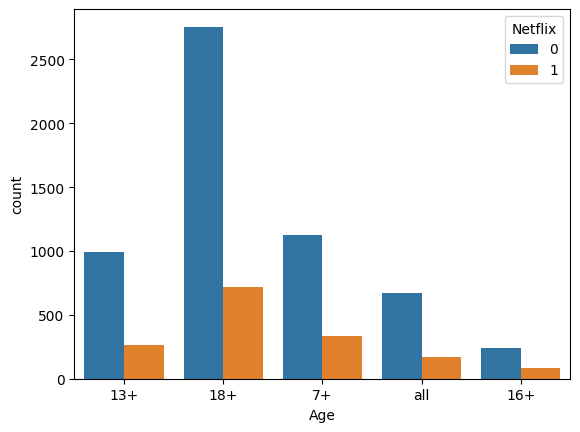

In [47]:
# Plot a countplot to determine what age group has streamed the most movies.
sns.countplot(x='Age', hue='Netflix', data=movies_ott_merge)

<Axes: xlabel='IMDb', ylabel='Count'>

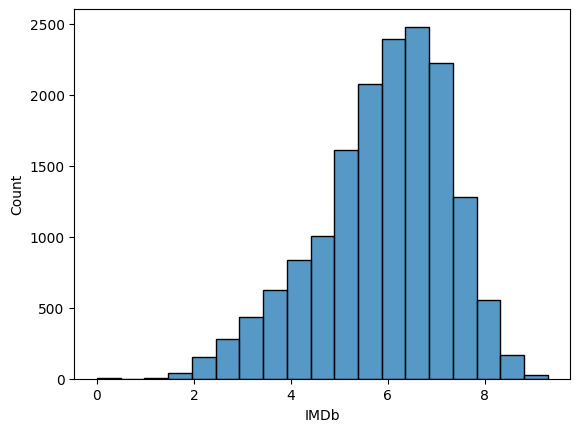

In [56]:
# Plot a histogram for the IMDb rating column.
sns.histplot(x='IMDb', data=movies_ott_merge, binwidth=0.5)

<Axes: xlabel='IMDb', ylabel='Rotten Tomatoes'>

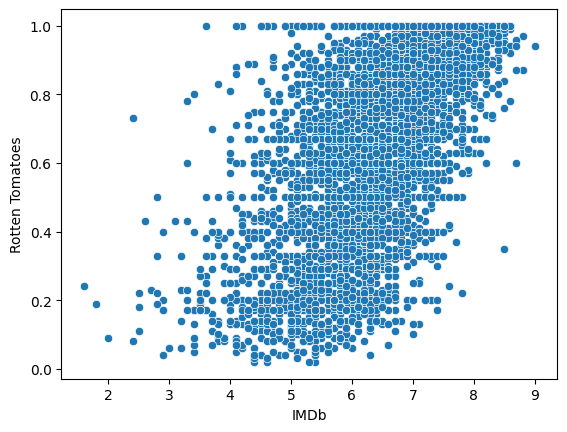

In [59]:
# Plot a scatterplot to display the correlation between the ratings from rotten tomatoes and IMDb.
sns.scatterplot(y='Rotten Tomatoes', x='IMDb', data= movies_ott_merge)